In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df=pd.read_csv("../Dataset/customer_churn_telecom_services.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [134]:
df.shape

(7043, 20)

In [135]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [136]:
df.dropna(axis=0,inplace=True)

In [137]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [138]:
df.shape

(7032, 20)

In [139]:
df.Partner.values

array(['Yes', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [140]:
def yes_no_conv(x):
    if (x=="Yes"):
        return 1
    else:
        return 0

In [141]:
columns=df.columns.tolist()

In [142]:
yes_no_contains=[]
for i in columns:
    if "Yes" in df[i].values:
        yes_no_contains.append(i)

In [143]:
yes_no_contains

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [144]:
yes_no_contains.remove("MultipleLines")

In [145]:
for i in yes_no_contains:
    df[i]=df[i].apply(yes_no_conv)

In [146]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [147]:
def gender_conv(x):
    if (x=="Female"):
        return 0
    else:
        return 1

In [148]:
df["gender"]=df["gender"].apply(gender_conv)

In [149]:
object_columns=df.select_dtypes(include="object").columns.tolist()
object_columns

['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

In [150]:
for i in object_columns:
    print(df[i].value_counts())

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


In [151]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [152]:
for i in object_columns:
    df[i]=encoder.fit_transform(df[i])

In [153]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [154]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df["tenure"]=scale.fit_transform(df[["tenure"]])
df["MonthlyCharges"]=scale.fit_transform(df[["MonthlyCharges"]])
df["TotalCharges"]=scale.fit_transform(df[["TotalCharges"]])

<Axes: >

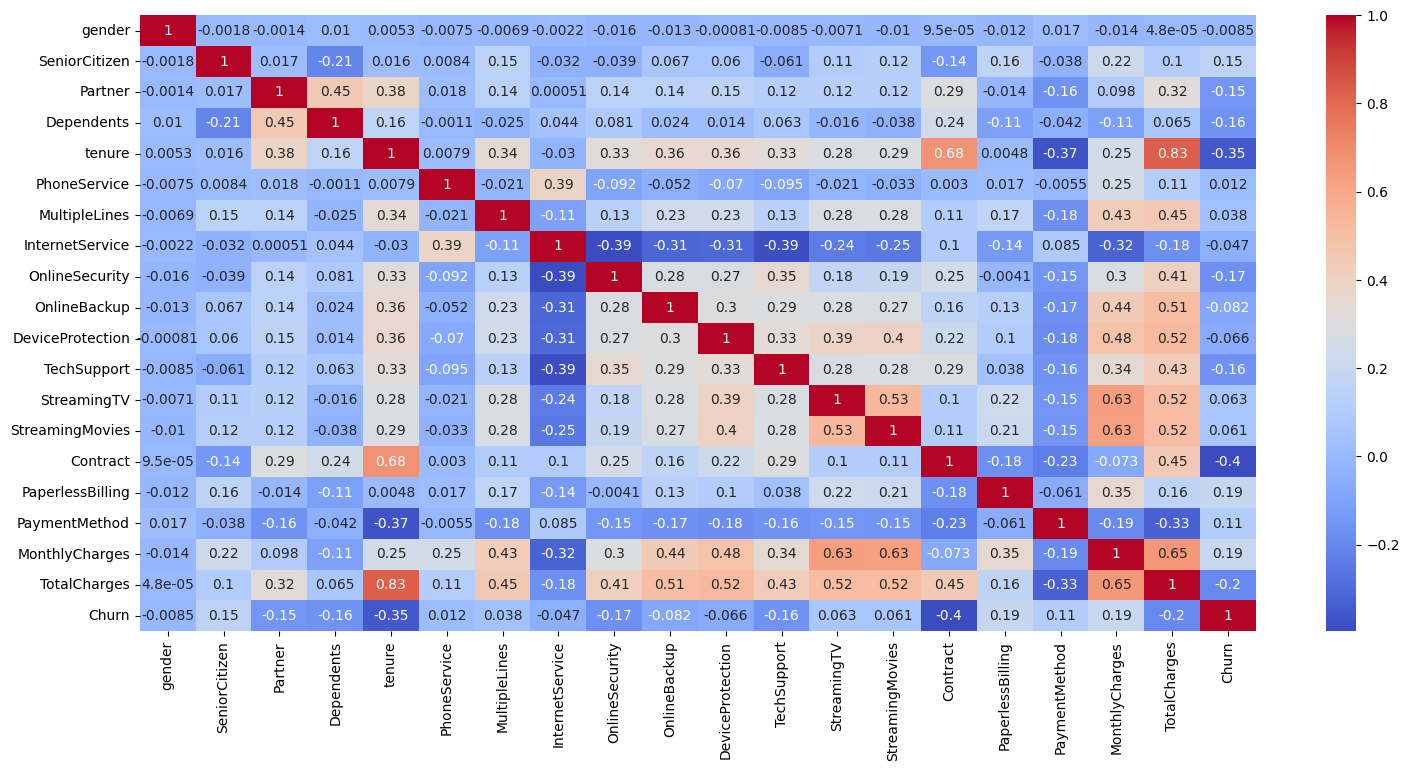

In [155]:
plt.figure(figsize=(18,8))

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [156]:
X=df.drop(columns=["Churn"])
Y=df["Churn"]

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

In [158]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()

In [159]:
random.fit(x_train,y_train)

RandomForestClassifier()

In [176]:
random_result=random.predict(x_test)

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [162]:
svc=SVC(kernel="rbf")
logistic=LogisticRegression()

In [ ]:
svc.fit(x_train,y_train)
svc_predict=svc.predict(x_test)

In [173]:
logistic.fit(x_train,y_train)
logistic_result=logistic.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
print(accuracy_score(random_result,y_test))
print(recall_score(random_result,y_test))
print(precision_score(random_result,y_test))

0.806680881307747
0.6413043478260869
0.5057142857142857


In [174]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
print(accuracy_score(svc_predict,y_test))
print(recall_score(svc_predict,y_test))
print(precision_score(svc_predict,y_test))

0.820184790334044
0.6963562753036437
0.49142857142857144


In [175]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
print(accuracy_score(logistic_result,y_test))
print(recall_score(logistic_result,y_test))
print(precision_score(logistic_result,y_test))

0.8137882018479033
0.6466666666666666
0.5542857142857143


In [165]:
import tensorflow as tf

In [166]:
neural=tf.keras.Sequential()

neural.add(tf.keras.layers.Dense(64, input_shape=[x_train.shape[1]],activation='relu'))
neural.add(tf.keras.layers.Dropout(.25))
neural.add(tf.keras.layers.Dense(50, activation='relu'))
neural.add(tf.keras.layers.Dropout(.25))
neural.add(tf.keras.layers.Dense(1, activation='sigmoid'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [167]:
neural.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,581 (17.89 KB)

 Trainable params: 4,581 (17.89 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
neural.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01)
,loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [169]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy', factor=0.5, patience=10, min_lr=1e-6
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', patience=30, restore_best_weights=True
)

In [ ]:
model=neural.fit(x_train,y_train,epochs=150,callbacks=[lr_scheduler,early_stopping],validation_data=(x_test, y_test),batch_size=32)

Epoch 1/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7484 - loss: 0.4896 - val_accuracy: 0.8195 - val_loss: 0.3861 - learning_rate: 0.0100
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8209 - loss: 0.3907 - val_accuracy: 0.8244 - val_loss: 0.3775 - learning_rate: 0.0100
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8389 - loss: 0.3756 - val_accuracy: 0.8287 - val_loss: 0.3711 - learning_rate: 0.0100
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8096 - loss: 0.3917 - val_accuracy: 0.8173 - val_loss: 0.3766 - learning_rate: 0.0100
Epoch 5/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.4066 - val_accuracy: 0.8365 - val_loss: 0.3604 - learning_rate: 0.0100
Epoch 6/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8110 - loss: 0.3826 - val_accuracy: 0.8316 - val_loss: 0.3602 - learning_rate: 0.0100
Epoch 7/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8287 - loss: 0.3701 - val_acc

In [171]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

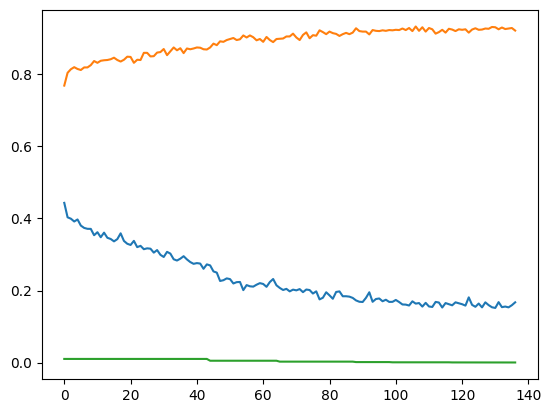

In [172]:
plt.plot(model.history["loss"])
plt.plot(model.history["accuracy"])
plt.plot(model.history["learning_rate"])